# 2. Machine Learning

## 2.3 Regression

### 2.3.1 Linear Regression

Linear regression is a statistical technique used to find the relationship between variables. In an ML context, linear regression finds the relationship between features and a label.

For example, suppose we want to predict a car's fuel efficiency in miles per gallon based on how heavy the car is, and we have the following dataset:

| Pounds in 1000s (feature) | Miles per gallon (label) |
|---------------------------|--------------------------|
| 3.5 | 18 |
| 3.69 | 15 |
| 3.44 | 18 |
| 3.43 | 16 |
| 4.34 | 15 |
| 4.42 | 14 |
| 2.37 | 24 |

If we plotted these points, we'd get the following graph:

![Car heaviness (in pounds) versus miles per gallon rating. As a car gets heavier, its miles per gallon rating generally decreases.](./img/car-data-points.png)

We could create our own model by drawing a best fit line through the points:

![A best fit line drawn through the data from the previous figure](./img/car-data-points-with-model.png)

**Linear regression equation**:

In algebraic terms, the model would be defined as $y = mx + b$, where

* $y$ is miles per gallon—the value we want to predict.
* $m$ is the slope of the line.
* $x$ is pounds—our input value.
* $b$ is the y-intercept.
In ML, we write the equation for a linear regression model as follows:

$$y' = b + w_1x_1$$

Where:

* $y'$ is the predicted label—the output.
* $b$ is the bias of the model. Bias is the same concept as the y-intercept in the algebraic equation for a line. In ML, bias is sometimes referred to as 
. Bias is a parameter of the model and is calculated during training.
* $w_1$ is the weight of the feature. Weight is the same concept as the slope 
 in the algebraic equation for a line. Weight is a parameter of the model and is calculated during training.
* $x_1$ is a feature—the input.

During training, the model calculates the weight and bias that produce the best model.

![Mathematical representation of a linear model.](./img/equation.png)

In our example, we'd calculate the weight and bias from the line we drew. The bias is 34 (where the line intersects the y-axis), and the weight is –4.6 (the slope of the line). The model would be defined as $y' = 34 -4.6x_1$, and we could use it to make predictions. For instance, using this model, a 4,000-pound car would have a predicted fuel efficiency of 15.6 miles per gallon.

![Using the model, a 4,000-pound car has a predicted fuel efficiency of 15.6 miles per gallon.](./img/model-prediction.png)

**Models with multiple features**:

Although the example in this section uses only one feature—the heaviness of the car—a more sophisticated model might rely on multiple features, each having a separate weight ($w_1$, $w_2$, etc.). For example, a model that relies on five features would be written as follows:

$$y' = b + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5$$

For example, a model that predicts gas mileage could additionally use features such as the following:

* Engine displacement
* Acceleration
* Number of cylinders
* Horsepower

This model would be written as follows:

![A model with five features to predict a car's miles per gallon rating.](./img/equation-multiple-features.png)

By graphing a couple of these additional features, we can see that they also have a linear relationship to the label, miles per gallon:

![A car's displacement in cubic centimeters and its miles per gallon rating. As a car's engine gets bigger, its miles per gallon rating generally decreases.](./img/displacement.png)

![A car's acceleration in seconds and its miles per gallon rating. As a car's acceleration time increases, its miles per gallon rating generally increases.](./img/acceleration.png)

**Alternative notation**:

$$ \hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n $$

In this equation:

* $\hat{y}$ is the predicted value.

* $n$ is the number of features.

* $x_i$ is the $i$ th feature value.
* $\theta_j$ is the $j$ th model parameter, including the bias term $\theta_0$ and the feature weights $\theta_1$, $\theta_2$, $\cdots$, $\theta_n$.

**Linear regression model prediction (vectorized form)**:

$$ \hat{y} = h_\theta(\mathbf{x}) = 𝛉 \cdot \mathbf{x} $$

In this equation:

* $h_\theta$ is the hypothesis function, using the model parameters $𝛉$.
* $𝛉$ is the model’s parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$.
* $\mathbf{x}$ is the instance’s feature vector, containing $x_0$ to $x_n$, with $x_0$ always equal to 1.
* $𝛉 \cdot \mathbf{x}$ is the dot product of the vectors $\theta$ and $x$, which is equal to $\theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$.

**Note**:
In machine learning, vectors are often represented as *column vectors*, which are 2D arrays with a single column. If 𝛉 and $\mathbf{x}$ are column vectors, then the prediction is $\hat{y}=𝛉^T\mathbf{x}$, where $𝛉^T$ is the transpose of 𝛉 (a row vector instead of a column vector) and $𝛉^T\mathbf{x}$ is the matrix multiplication of $𝛉^T$ and $\mathbf{x}$. It is of course the same prediction, except that it is now represented as a single-cell matrix rather than a scalar value.

![Assumptions of Linear Regression](./img/lin_reg.png)

OK, that’s the linear regression model—but how do we train it? Well, recall that training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well (or poorly) the model fits the training data. We previously saw that the most common performance measure of a regression model is the root mean squared error. Therefore, a way to train a linear regression model is to find the value of 𝛉 that minimizes the RMSE. In practice, it is simpler to minimize the mean squared error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a positive function also minimizes its square root).

#### 2.3.1.1 The Normal Equation

To find the value of 𝛉 that minimizes the MSE, there exists a closed-form solution—in other words, a mathematical equation that gives the result directly. This is called the normal equation.

$$ \hat{\mathbf{\theta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} $$

In this equation:

* $\hat{\mathbf{\theta}}$ is the value of 𝛉 that minimizes the cost function (mean squared error).
* $\mathbf{X}$ is the design matrix, which contains the feature vectors of all training instances as rows.
* $\mathbf{y}$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$ for all $m$ training instances.

Let’s generate some linear-looking data to test this equation on:

In [1]:
import numpy as np

rng = np.random.default_rng(seed=42)
m = 200  # number of instances
X = 2 * rng.random((m, 1))  # column vector
y = 4 + 3 * X + rng.standard_normal((m, 1))  # column vector

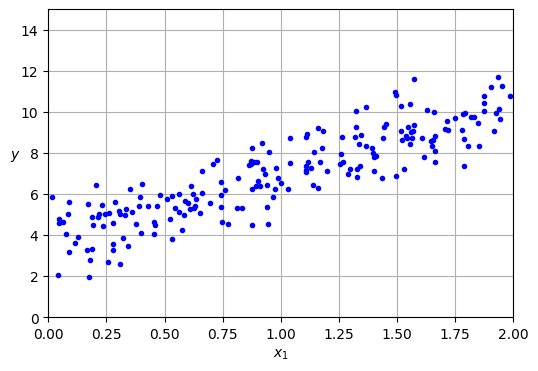

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis((0, 2, 0, 15))
plt.grid()

plt.show()

Now let’s compute $\hat{\mathbf{\theta}}$ using the normal equation. We will use the `inv()` function from NumPy’s linear algebra module (`np.linalg`) to compute the inverse of a matrix, and the @ operator for matrix multiplication:

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

The function that we used to generate the data is $y = 4 + 3x_1 + \text{Gaussian noise}$. Let’s see what the equation found:

In [4]:
theta_best

array([[3.69084138],
       [3.32960458]])

We would have hoped for $\theta_0 = 4$ and $\theta_1 = 3$ instead of $\theta_0 = 3.6908$ and $\theta_1 = 3.3296$. Close enough, but the noise made it impossible to recover the exact parameters of the original function. The smaller and noisier the dataset, the harder it gets.

Now we can make predictions using $\hat{\mathbf{\theta}}$:

In [5]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[ 3.69084138],
       [10.35005055]])

Let's plot this model's predictions:

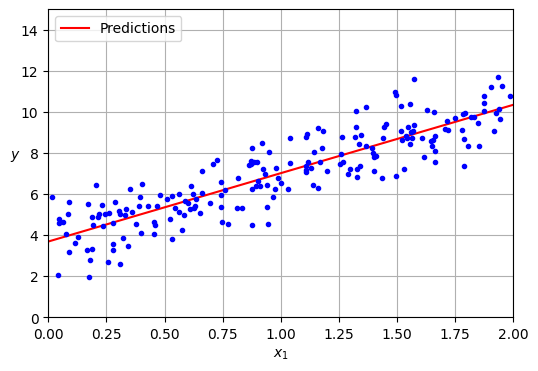

In [6]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis((0, 2, 0, 15))
plt.grid()
plt.legend(loc="upper left")

plt.show()

Performing linear regression using Scikit-Learn is relatively straightforward:

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.69084138]), array([[3.32960458]]))

In [8]:
lin_reg.predict(X_new)

array([[ 3.69084138],
       [10.35005055]])

Notice that Scikit-Learn separates the bias term (`intercept_`) from the feature weights (`coef_`).

**Note:** Scikit-learn uses a technique called *singular value decomposition* (SVD) to solve the normal equation. This approach is more efficient than computing the normal equation, plus it handles edge cases nicely: indeed, the normal equation may not work if the matrix $\mathbf{X}^T \mathbf{X}$ is not invertible (i.e., singular), such as if $m < n$ or if some features are redundant, but the pseudoinverse is always defined.

#### 2.3.1.2 Gradient Descent Regression

To perform linear regression using stochastic GD with Scikit-Learn, you can use the `SGDRegressor` class, which defaults to optimizing the MSE cost function. The following code runs for a maximum of 1,000 epochs (`max_iter`) or until the loss drops by less than $10^{-5}$ (`tol`) during 100 epochs (`n_iter_no_change`). It starts with a learning rate of 0.01 (`eta0`), using the default learning schedule. Lastly, it does not use any regularization (`penalty=None`; more details on this shortly):

In [9]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,1e-05
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


Once again, you find a solution quite close to the one returned by the normal equation:

In [10]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.68899733]), array([3.33054574]))

**Tip:** All Scikit-Learn estimators can be trained using the `fit()` method, but some estimators also have a `partial_fit()` method that you can call to run a single round of training on one or more instances (it ignores hyperparameters like `max_iter` or `tol`). Repeatedly calling `partial_fit()` will gradually train the model. This is useful when you need more control over the training process. Other models have a `warm_start` hyperparameter instead (and some have both): if you set `warm_start=True`, calling the `fit()` method on a trained model will not reset the model; it will just continue training where it left off, respecting hyperparameters like `max_iter` and `tol`. Note that `fit()` resets the iteration counter used by the learning schedule, while `partial_fit()` does not.

### 2.3.2 Loss

Loss is a numerical metric that describes how wrong a model's predictions are. Loss measures the distance between the model's predictions and the actual labels. The goal of training a model is to minimize the loss, reducing it to its lowest possible value.

In the following image, you can visualize loss as arrows drawn from the data points to the model. The arrows show how far the model's predictions are from the actual values.

![ Loss is measured from the actual value to the predicted value.](./img/loss-lines.png)

**Distance of loss**:

In statistics and machine learning, loss measures the difference between the predicted and actual values. Loss focuses on the distance between the values, not the direction. For example, if a model predicts 2, but the actual value is 5, we don't care that the loss is negative $(2 - 5 = -3)$. Instead, we care that the distance between the values is 3. Thus, all methods for calculating loss remove the sign.

The two most common methods to remove the sign are the following:

* Take the absolute value of the difference between the actual value and the prediction.
* Square the difference between the actual value and the prediction.

**Types of loss**:

In linear regression, there are five main types of loss, which are outlined in the following table.

| Loss Type | Definition | Equation |
|-----------|------------|----------|
| $L_1$ loss | The sum of the absolute values of the difference between the predicted values and the actual values. | $\sum \| \text{actual value}-\text{predicted value}\| $
| Mean Absolute Error (MAE) | The average of $L_1$ losses across a set of $N$ examples. | $\frac{1}{N} \sum \| \text{actual value}-\text{predicted value}\| $
| $L_2$ loss | The sum of the squared differences between the predicted values and the actual values. | $\sum (\text{actual value}-\text{predicted value})^2 $ |
| Mean Squared Error (MSE) | The average of $L_2$ losses across a set of $N$ examples. | $\frac{1}{N} \sum (\text{actual value}-\text{predicted value})^2 $ |
| Root Mean Squared Error (RMSE) | The square root of the MSE. | $\sqrt{\frac{1}{N} \sum (\text{actual value}-\text{predicted value})^2 } $ |

The functional difference between $L_1$ loss and $L_2$ loss (or between MAE/RMSE and MSE) is squaring. When the difference between the prediction and label is large, squaring makes the loss even larger. When the difference is small (less than 1), squaring makes the loss even smaller.

Loss metrics like MAE and RMSE may be preferable to $L_2$ loss or MSE in some use cases because they tend to be more human-interpretable, as they measure error using the same scale as the model's predicted value.

**Note**: MAE and RMSE can differ quite widely. MAE represents the average prediction error, whereas RMSE represents the "spread" of the errors, and is more skewed by larger errors.

When processing multiple examples at once, we recommend averaging the losses across all the examples, whether using MAE, MSE, or RMSE.

**Choosing a loss**:

Deciding whether to use MAE or MSE can depend on the dataset and the way you want to handle certain predictions. Most feature values in a dataset typically fall within a distinct range. For example, cars are normally between 2000 and 5000 pounds and get between 8 to 50 miles per gallon. An 8,000-pound car, or a car that gets 100 miles per gallon, is outside the typical range and would be considered an outlier.

An outlier can also refer to how far off a model's predictions are from the real values. For instance, 3,000 pounds is within the typical car-weight range, and 40 miles per gallon is within the typical fuel-efficiency range. However, a 3,000-pound car that gets 40 miles per gallon would be an outlier in terms of the model's prediction because the model would predict that a 3,000-pound car would get around 20 miles per gallon.

When choosing the best loss function, consider how you want the model to treat outliers. For instance, MSE moves the model more toward the outliers, while MAE doesn't. L2 loss incurs a much higher penalty for an outlier than L1 loss. For example, the following images show a model trained using MAE and a model trained using MSE. The red line represents a fully trained model that will be used to make predictions. The outliers are closer to the model trained with MSE than to the model trained with MAE.

![MSE loss moves the model closer to the outliers.](./img/model-mse.png)

![MAE loss keeps the model farther from the outliers.](./img/model-mae.png)

Note the relationship between the model and the data:

* **MSE**: The model is closer to the outliers but further away from most of the other data points.
* **MAE**: The model is further away from the outliers but closer to most of the other data points.

**Choose MSE**:

* If you want to heavily penalize large errors.
* If you believe the outliers are important and indicative of true data variance that the model should account for.

**Choose MAE**:

* If your dataset has significant outliers that you don't want to overly influence the model. MAE is more robust.
* If you prefer a loss function that is more directly interpretable as the average error magnitude.

In practice, your metric choice can also depend on the specific business problem and what kind of errors are more costly.

### 2.3.3 Polynomial Regression

What if your data is more complex than a straight line? Surprisingly, you can use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called polynomial regression.

Let’s look at an example. First, we’ll generate some nonlinear data, based on a simple quadratic equation—that’s an equation of the form $y = ax^2 + bx + c$—plus some noise:

In [11]:
rng = np.random.default_rng(seed=42)
m = 200  # number of instances
X = 6 * rng.random((m, 1)) - 3
y = 0.5 * X ** 2 + X + 2 + rng.standard_normal((m, 1))

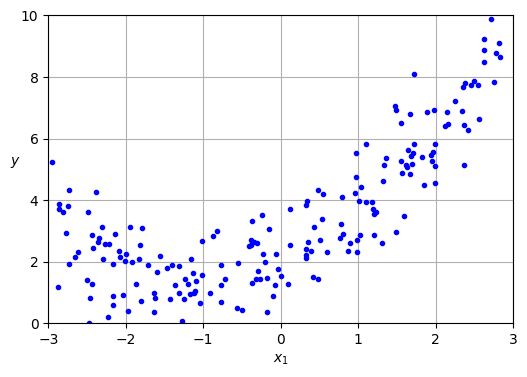

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis((-3, 3, 0, 10))
plt.grid()

plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s `PolynomialFeatures` class to transform our training data, adding the square (second-degree polynomial) of each feature in the training set as a new feature (in this case there is just one feature):

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.64373629])

In [14]:
X_poly[0]

array([1.64373629, 2.701869  ])

`X_poly` now contains the original feature of `X` plus the square of this feature. Now we can fit a `LinearRegression` model to this extended training data :

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.00540719]), array([[1.11022126, 0.50526985]]))

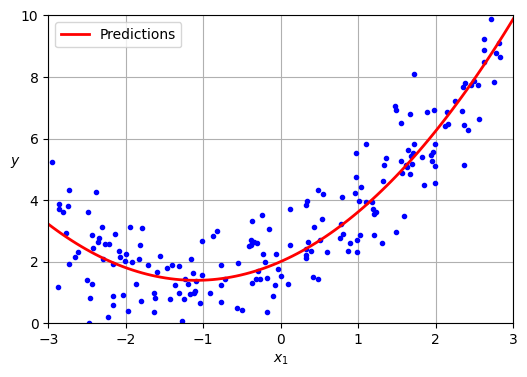

In [16]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis((-3, 3, 0, 10))
plt.grid()

plt.show()

Not bad: the model estimates $\hat{y} = 0.56 x_1^2 + 0.93 x_1 + 1.78$ when in fact the original function was $y = 0.5 x_1^2 + 1.0 x_1 + 2.0 +$ Gaussian noise.

Note that when there are multiple features, polynomial regression is capable of finding relationships between features, which is something a plain linear regression model cannot do. This is made possible by the fact that `PolynomialFeatures` also adds all combinations of features up to the given degree. For example, if there were two features $a$ and $b$, `PolynomialFeatures` with `degree=3` would not only add the features $a^2$, $a^3$, $b^2$, and $b^3$, but also the combinations $ab$, $a^2b$, and $ab^2$.

If you perform high-degree polynomial regression, you will likely fit the training data much better than with plain linear regression. For example, in the next figure a 300-degree polynomial model is applied to the preceding training data, and compares the result with a pure linear model and a quadratic model (second-degree polynomial). Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.

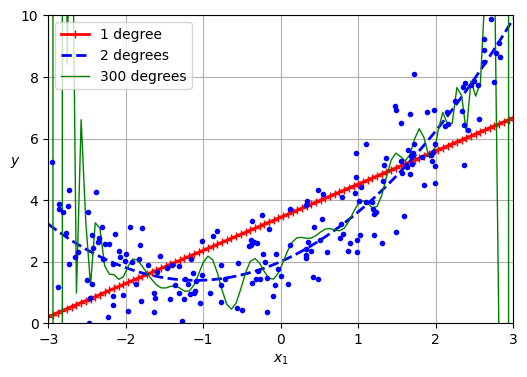

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis((-3, 3, 0, 10))
plt.grid()

plt.show()

**Warning**: `PolynomialFeatures(degree=d)` transforms an array containing $n$ features into an array containing $\frac{(n + d)!}{d! \, n!}$ features, where $n!$ is the factorial of $n$, equal to $1 \times 2 \times 3 \times \cdots \times n$. Beware of the combinatorial explosion of the number of features!

This high-degree polynomial regression model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model, which makes sense because the data was generated using a quadratic model. But in general you won’t know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?

We have used cross-validation to get an estimate of a model’s generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.

### 2.3.4 Regularized Linear Models

A good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

What about linear models? Can we regularize them too? You may wonder why we may want to do that: aren’t linear models constrained enough already? Well, linear regression makes a few assumptions, including the fact that the true relationship between the inputs and the outputs is linear, the noise has zero mean, constant variance, and is independent of the inputs, plus the input matrix has full rank, meaning that the inputs are not colinear⁠ and there at least as many samples as parameters. In practice, some assumptions don’t hold perfectly. For example, some inputs may be close to colinear, which makes linear regression numerically unstable, meaning that very small differences in the training set can have a big impact on the trained model. Regularization can stabilize linear models and make them more accurate.

So how can we regularize a linear model? This is usually done by constraining its weights. In this section, we will discuss ridge regression, lasso regression, and elastic net regression, which implement three different ways to do that.

#### 2.3.4.1 Ridge Regression

Ridge regression is a regularized version of linear regression: a regularization term equal to $$ \frac{\alpha}{m} \sum_{i=1}^{n} \theta_i^2 $$
 is added to the MSE. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. This constraint makes the model less flexible, preventing it from stretching itself too much to fit every data point: this reduces the risk of overfitting. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to use the unregularized MSE (or the RMSE) to evaluate the model’s performance.

The hyperparameter α controls how much you want to regularize the model. If $\alpha = 0$, then ridge regression is just linear regression. If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

**The ridge regression cost function**:

$$ J(𝛉) = MSE(𝛉) + \frac{\alpha}{m} \sum_{i=1}^{n} \theta_i^2 $$

Note that the bias term $ \theta_0 $ is not regularized (the sum starts at $i = 1$, not $0$).

**Ridge regression closed-form solution**:

$$\hat{𝛉} = (\mathbf{X}^\top \mathbf{X} + \alpha \mathbf{A})^{-1} \mathbf{X}^\top \mathbf{y}$$

In this equation, $\mathbf{A}$ is an identity matrix with a zero in the top-left corner to avoid regularizing the bias term.

**Warning**: It is important to scale the data (e.g., using a `StandardScaler`) before performing ridge regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

Let's generate a very small and noisy linear dataset:

In [19]:
rng = np.random.default_rng(seed=42)
m = 20  # number of instances
X = 3 * rng.random((m, 1))
y = 1 + 0.5 * X + rng.standard_normal((m, 1)) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

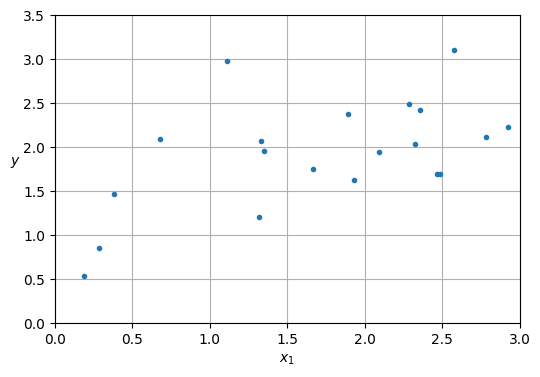

In [20]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis((0, 3, 0, 3.5))
plt.grid()
plt.show()

Here is how to perform ridge regression with Scikit-Learn using a closed-form solution:

In [21]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.84414523])

The next figure shows several ridge models that were trained on some very noisy linear data using different $\alpha$ values. On the left, plain ridge models are used, leading to linear predictions. On the right, the data is first expanded using `PolynomialFeatures(degree=10)`, then it is scaled using a `StandardScaler`, and finally the ridge models are applied to the resulting features: this is polynomial regression with ridge regularization. Note how increasing α leads to flatter (i.e., less extreme, more reasonable) predictions, thus reducing the model’s variance but increasing its bias.

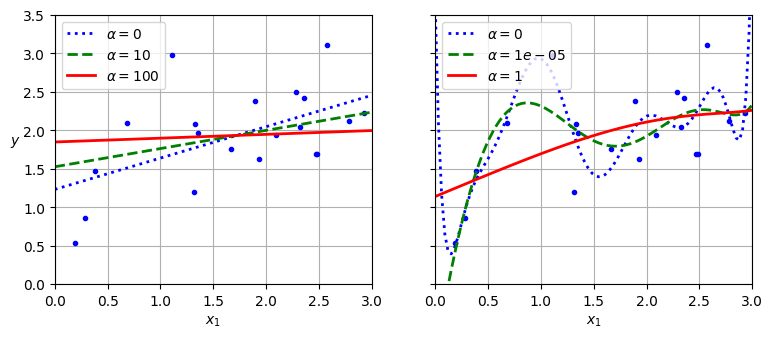

In [22]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis((0, 3, 0, 3.5))
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])

plt.show()

As with linear regression, we can perform ridge regression either by computing a closed-form equation or by performing gradient descent.

In [23]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([1.83659707])

In [24]:
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.84415109])

The penalty hyperparameter sets the type of regularization term to use. Specifying `"l2"` indicates that you want SGD to add a regularization term to the MSE cost function equal to `alpha` times the square of the $ℓ_2$ norm of the weight vector. This is just like ridge regression, except there’s no division by $m$ in this case; that’s why we passed `alpha=0.1 / m`, to get the same result as `Ridge(alpha=0.1)`.

In [27]:
# extra code – shows the closed form solution of Ridge regression,
#              compare with the next Ridge model's learned parameters below
alpha = 0.1
I = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * I) @ X_b.T @ y

array([[1.23749481],
       [0.40443361]])

In [26]:
ridge_reg.intercept_, ridge_reg.coef_  # extra code

(array([1.23754037]), array([0.40440715]))

**Tip**: The `RidgeCV` class also performs ridge regression, but it automatically tunes hyperparameters using cross-validation. It’s roughly equivalent to using `GridSearchCV`, but it’s optimized for ridge regression and runs *much* faster. Several other estimators (mostly linear) also have efficient CV variants, such as `LassoCV` and `ElasticNetCV`.

#### 2.3.4.2 Lasso Regression

*Least absolute shrinkage and selection operator regression* (usually simply called *lasso regression*) is another regularized version of linear regression: just like ridge regression, it adds a regularization term to the cost function, but it uses the $ℓ_1$ norm of the weight vector instead of the square of the $ℓ_2$ norm. Notice that the $ℓ_1$ norm is multiplied by $2\alpha$, whereas the $ℓ_2$ norm was multiplied by $\alpha / m$ in ridge regression. These factors were chosen to ensure that the optimal $\alpha$ value is independent from the training set size: different norms lead to different factors.

**The lasso regression cost function**:

$$ J(𝛉) = MSE(𝛉) + 2\alpha \sum_{i=1}^{n} |\theta_i| $$

In [28]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.87550211])

Note that you could instead use `SGDRegressor(penalty="l1", alpha=0.1)`.

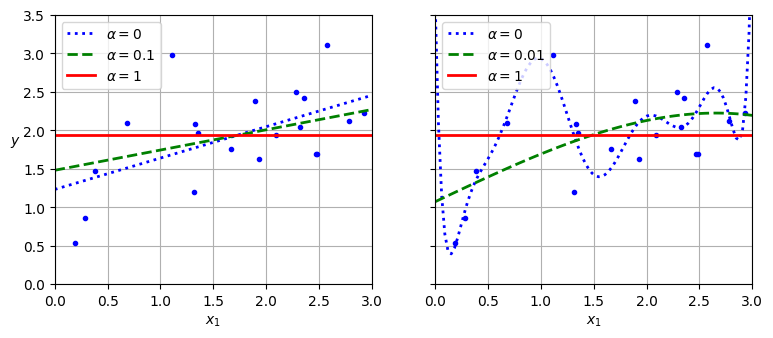

In [29]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])

plt.show()

An important characteristic of lasso regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero). For example, the dashed line in the righthand plot (with $\alpha = 0.01$) looks roughly cubic: all the weights for the high-degree polynomial features are equal to zero. In other words, lasso regression automatically performs feature selection and outputs a *sparse model* with few nonzero feature weights. Of course, there’s a trade-off: if you increase $\alpha$ too much, the model will be very sparse, but its performance will plummet.

#### 2.3.4.3 Elastic Net Regression

Elastic net regression is a middle ground between ridge regression and lasso regression. The regularization term is a weighted sum of both ridge and lasso’s regularization terms, and you can control the mix ratio $r$. When $r = 0$, elastic net is equivalent to ridge regression, and when $r = 1$, it is equivalent to lasso regression

**Elastic net cost function**:

$$ J(𝛉) = MSE(𝛉) + r \left( 2\alpha \sum_{i=1}^{n} |\theta_i| \right) + \left(1 - r \right) \left( \frac{\alpha}{m} \sum_{i=1}^{n} \theta_i^2 \right) $$

So when should you use elastic net regression, or ridge, lasso, or plain linear regression (i.e., without any regularization)? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain linear regression. Ridge is a good default, but if you suspect that only a few features are useful, you should prefer lasso or elastic net because they tend to reduce the useless features’ weights down to zero, as discussed earlier. In general, elastic net is preferred over lasso because lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

Here is a short example that uses Scikit-Learn’s `ElasticNet` (`l1_ratio` corresponds to the mix ratio `r`):

In [18]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.006944])

### 2.3.5 Logistic Regression

**Logistic regression will be covered in Deep Learning course.**

---
**References:**

Disclaimer: Some of the material in this notebook is adapted from other sources. These references are provided for further reading and to acknowledge the original authors.

* Chapter 4 Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron, [3rd edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/)

* [Linear Regression](https://developers.google.com/machine-learning/crash-course/linear-regression)